In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [2]:
def parse_xml(xml_file):
    try:
        tree = ET.parse(xml_file)
        root = tree.getroot()
        # Retrieve all class names from <object> tags
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            if class_name:
                return class_name
        print(f"No class name found in XML: {xml_file}")
        return None
    except Exception as e:
        print(f"Error parsing XML {xml_file}: {e}")
        return None

def load_data(image_dir, xml_dir, class_names):
    images = []
    labels = []
    for class_name in class_names:
        class_folder = os.path.join(image_dir, class_name)
        xml_folder = os.path.join(xml_dir, class_name)
        for img_file in os.listdir(class_folder):
            if img_file.endswith(".jpg"):
                img_path = os.path.join(class_folder, img_file)
                xml_file = os.path.join(xml_folder, img_file.replace(".jpg", ".xml",))
                class_label = parse_xml(xml_file)
                
                # Skip if no valid class label is found
                if class_label is None:
                    print(f"Skipping {img_file} due to missing class label.")
                    continue
                
                # Ensure the class label exists in class_names
                if class_label in class_names:
                    images.append(img_path)
                    labels.append(class_names.index(class_label))
                else:
                    print(f"Warning: {class_label} is not a valid class.")
    return images, labels


In [3]:
def preprocess_images(image_paths, labels, img_size=(224, 224)):
    images = []
    for img_path in image_paths:
        try:
            # Debug: Check if the image path exists
            if not os.path.exists(img_path):
                print(f"Warning: Image path does not exist: {img_path}")
                continue

            # Load the image and print its size before conversion
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
            print(f"Loaded image: {img_path} - Image size: {img.size}")

            # Convert image to array
            img = tf.keras.preprocessing.image.img_to_array(img)

            # Check if the image is empty or filled with zeros
            if np.all(img == 0):
                print(f"Warning: Image {img_path} is filled with zeros after conversion.")
                continue
            
            images.append(img)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
    
    images = np.array(images)
    
    # Debug: Check the shape of the images array
    print(f"Processed images shape: {images.shape}")
    
    images = images / 255.0  # Normalize images to [0, 1]
    
    # Ensure labels are properly aligned
    labels = np.array(labels)
    print(f"Labels length: {len(labels)}")
    
    return images, labels

# Load data
class_names = ["dry_cracked", "inflammed", "pale"]
image_dir = "E:/lips/augmented_train"
xml_dir = "E:/lips/annotation"
image_paths, labels = load_data(image_dir, xml_dir, class_names)

# Debug: Check how many images were loaded
print(f"Number of image paths: {len(image_paths)}")
print(f"Number of labels: {len(labels)}")

# Preprocess images
images, labels = preprocess_images(image_paths, labels)

# Debug: Check if images are successfully loaded
if len(images) > 0:
    # Optionally check a few images
    plt.imshow(images[0])
    plt.title(f"Label: {class_names[labels[0]]}")
    plt.show()
else:
    print("No images were loaded. Please check the image paths and data.")


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'E:/lips/augmented_train\\dry_cracked'

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


c:\Users\admin\miniforge3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(images, labels, epochs=10, validation_split=0.15, batch_size=32)


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.3368 - loss: 1.6633 - val_accuracy: 0.0000e+00 - val_loss: 1.5000
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.3953 - loss: 1.0890 - val_accuracy: 0.0000e+00 - val_loss: 1.2597
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.4080 - loss: 1.0325 - val_accuracy: 0.8000 - val_loss: 1.0509
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.4937 - loss: 0.9995 - val_accuracy: 0.0333 - val_loss: 1.6378
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5829 - loss: 0.8335 - val_accuracy: 0.0667 - val_loss: 1.6915
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.7627 - loss: 0.6173 - val_accuracy: 0.2778 - val_loss: 1.8899
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.7955 - loss: 0.5177 - val_accuracy: 0.1000 - val_loss: 2.9698
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.8811 - loss: 0.3173 - val_accuracy: 0.2778 - v

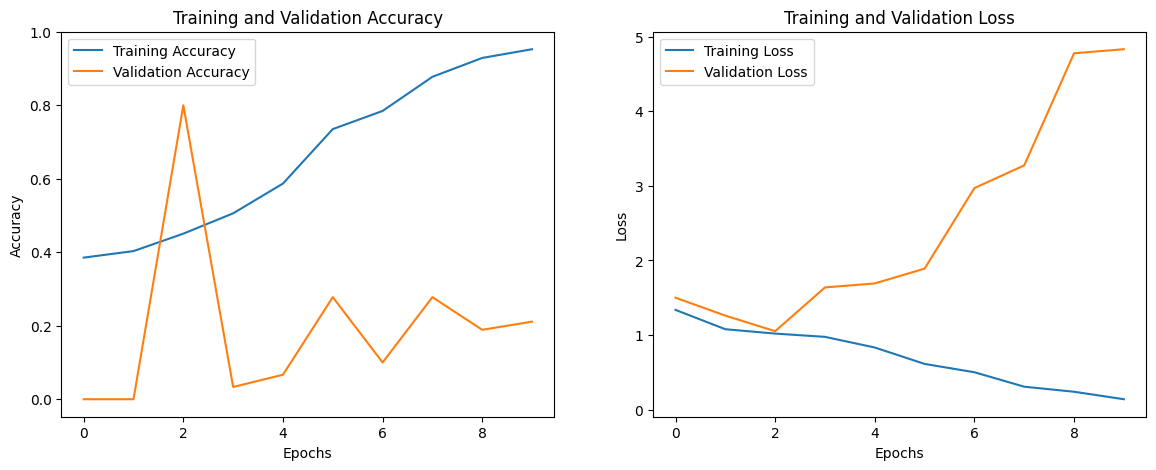

In [ ]:

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss over epochs
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 364ms/step
              precision    recall  f1-score   support

 dry_cracked       0.84      0.99      0.91       198
   inflammed       0.84      0.98      0.90       198
        pale       0.97      0.64      0.77       200

    accuracy                           0.87       596
   macro avg       0.88      0.87      0.86       596
weighted avg       0.88      0.87      0.86       596



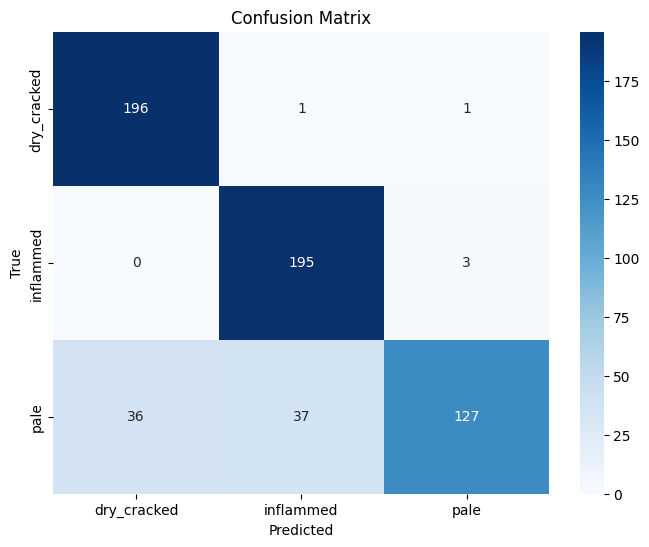

In [ ]:
# Predict on validation data
preds = np.argmax(model.predict(images), axis=1)

# Confusion matrix and classification report
cm = confusion_matrix(labels, preds)
print(classification_report(labels, preds, target_names=class_names))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


No class name found in XML: C:/Users/kaush/Downloads/lips/lips/annotation\inflammed\aug_0_9098.xml
Skipping aug_0_9098.jpg due to missing class label.
Number of images: 596
Number of labels: 596


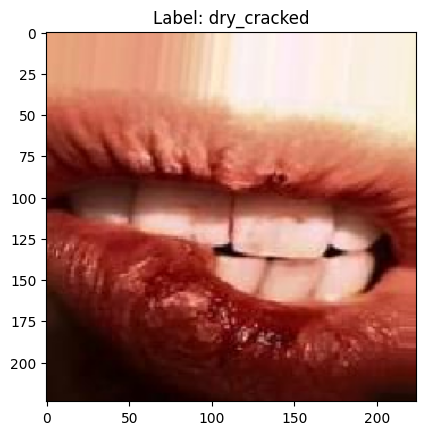

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 49s 3s/step - accuracy: 0.3406 - loss: 1.2331 - val_accuracy: 0.0000e+00 - val_loss: 1.4677
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.4269 - loss: 1.1207 - val_accuracy: 0.0000e+00 - val_loss: 1.4814
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.3715 - loss: 1.1761 - val_accuracy: 0.0000e+00 - val_loss: 1.4847
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.3851 - loss: 1.1286 - val_accuracy: 0.0000e+00 - val_loss: 1.4957
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.3710 - loss: 1.1581 - val_accuracy: 0.0000e+00 - val_loss: 1.4806
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.4371 - loss: 1.1012 - val_accuracy: 0.0000e+00 - val_loss: 1.4236
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.4061 - loss: 1.1088 - val_accuracy: 0.0000e+00 - val_loss: 1.4206
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.4191 - loss: 1.0914 - val_

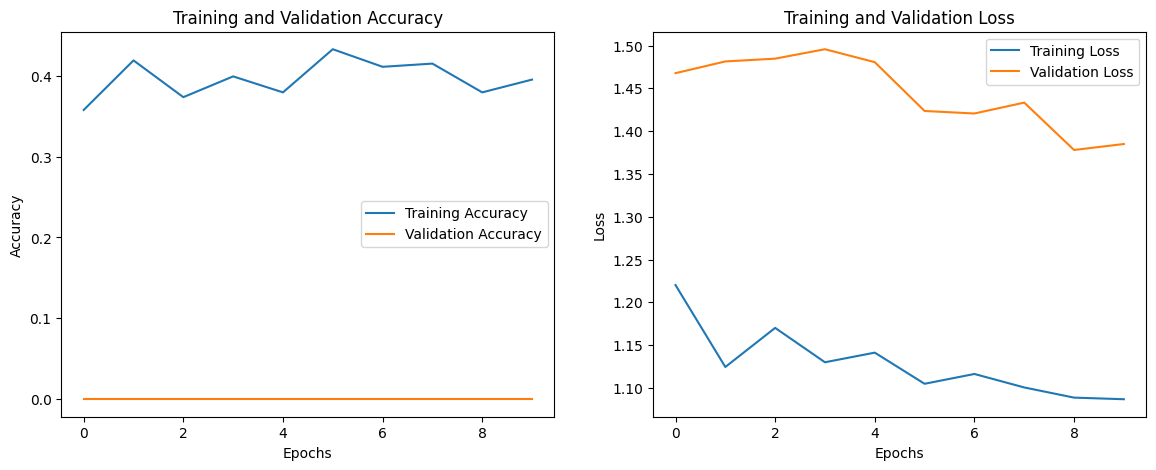

19/19 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step
              precision    recall  f1-score   support

 dry_cracked       0.42      0.63      0.50       198
   inflammed       0.37      0.56      0.45       198
        pale       0.00      0.00      0.00       200

    accuracy                           0.39       596
   macro avg       0.26      0.40      0.32       596
weighted avg       0.26      0.39      0.31       596



C:\Users\kaush\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kaush\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kaush\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

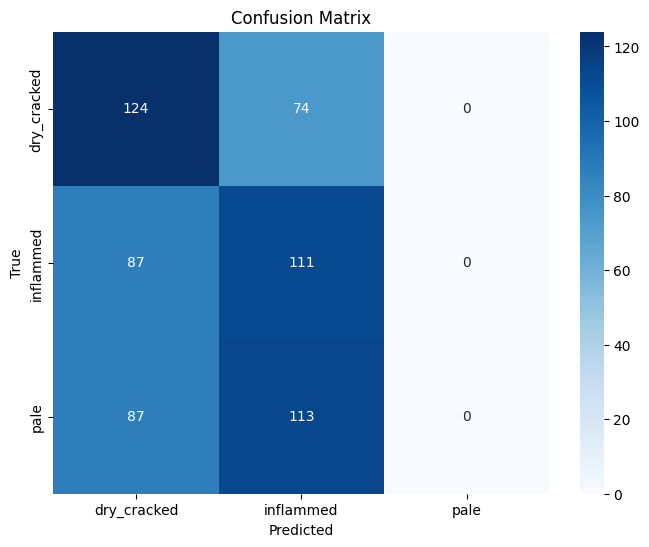

In [ ]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Parse XML to get class labels
def parse_xml(xml_file):
    try:
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            if class_name:
                return class_name
        print(f"No class name found in XML: {xml_file}")
        return None
    except Exception as e:
        print(f"Error parsing XML {xml_file}: {e}")
        return None

# Load images and corresponding labels
def load_data(image_dir, xml_dir, class_names):
    images = []
    labels = []
    for class_name in class_names:
        class_folder = os.path.join(image_dir, class_name)
        xml_folder = os.path.join(xml_dir, class_name)
        for img_file in os.listdir(class_folder):
            if img_file.endswith(".jpg"):
                img_path = os.path.join(class_folder, img_file)
                xml_file = os.path.join(xml_folder, img_file.replace(".jpg", ".xml"))
                class_label = parse_xml(xml_file)

                if class_label is None:
                    print(f"Skipping {img_file} due to missing class label.")
                    continue

                if class_label in class_names:
                    images.append(img_path)
                    labels.append(class_names.index(class_label))
                else:
                    print(f"Warning: {class_label} is not a valid class.")
    return images, labels

# Preprocess images
def preprocess_images(image_paths, labels, img_size=(224, 224)):
    images = []
    for img_path in image_paths:
        try:
            if not os.path.exists(img_path):
                print(f"Warning: Image path does not exist: {img_path}")
                continue

            img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
            img = tf.keras.preprocessing.image.img_to_array(img)

            if np.all(img == 0):
                print(f"Warning: Image {img_path} is filled with zeros after conversion.")
                continue
            
            images.append(img)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
    
    images = np.array(images) / 255.0  # Normalize
    labels = np.array(labels)
    return images, labels

# Define class names
class_names = ["dry_cracked", "inflammed", "pale"]

# Directories for images and annotations
image_dir = "C:/Users/kaush/Downloads/lips/lips/augmented_train"
xml_dir = "C:/Users/kaush/Downloads/lips/lips/annotation"

# Load and preprocess the data
image_paths, labels = load_data(image_dir, xml_dir, class_names)
print(f"Number of images: {len(image_paths)}")
print(f"Number of labels: {len(labels)}")
images, labels = preprocess_images(image_paths, labels)

# Display a sample image
if len(images) > 0:
    plt.imshow(images[0])
    plt.title(f"Label: {class_names[labels[0]]}")
    plt.show()
else:
    print("No images were loaded. Please check the image paths and data.")

# Load VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(len(class_names), activation='softmax')(x)

# Build the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(images, labels, epochs=10, validation_split=0.15, batch_size=32)

# Plot accuracy and loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# Evaluate the model
preds = np.argmax(model.predict(images), axis=1)

# Confusion matrix and classification report
cm = confusion_matrix(labels, preds)
print(classification_report(labels, preds, target_names=class_names))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


No class name found in XML: C:/Users/kaush/Downloads/lips/lips/annotation\inflammed\aug_0_9098.xml
Skipping aug_0_9098.jpg due to missing class label.
Number of images: 596
Number of labels: 596


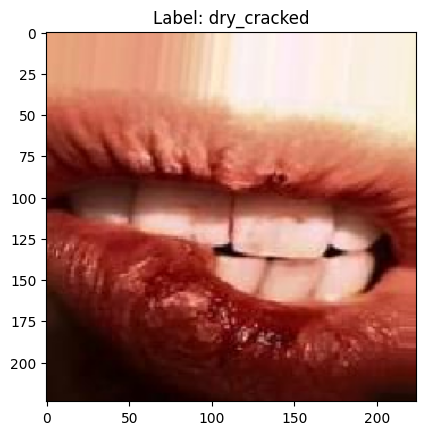

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 781ms/step - accuracy: 0.3384 - loss: 1.5942 - val_accuracy: 0.1444 - val_loss: 1.5296
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 707ms/step - accuracy: 0.4285 - loss: 1.3688 - val_accuracy: 0.1778 - val_loss: 1.5276
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 685ms/step - accuracy: 0.4624 - loss: 1.1834 - val_accuracy: 0.2556 - val_loss: 1.4263
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 662ms/step - accuracy: 0.4799 - loss: 1.1056 - val_accuracy: 0.4444 - val_loss: 1.1833
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 646ms/step - accuracy: 0.5282 - loss: 0.9513 - val_accuracy: 0.4778 - val_loss: 1.1562
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 645ms/step - accuracy: 0.5835 - loss: 0.9173 - val_accuracy: 0.4222 - val_loss: 1.2188
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 644ms/step - accuracy: 0.6143 - loss: 0.8653 - val_accuracy: 0.5000 - val_loss: 1.0765
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 650ms/step - accuracy: 0.6099 - loss: 0.8560 - val_accu

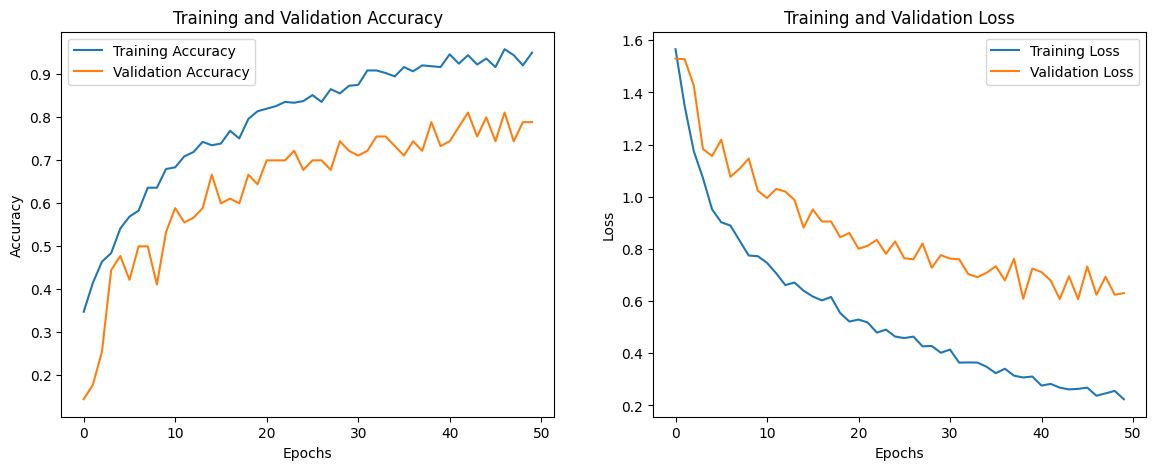

19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 588ms/step
              precision    recall  f1-score   support

 dry_cracked       0.95      1.00      0.97       198
   inflammed       0.96      0.99      0.98       198
        pale       0.99      0.90      0.94       200

    accuracy                           0.96       596
   macro avg       0.97      0.96      0.96       596
weighted avg       0.97      0.96      0.96       596



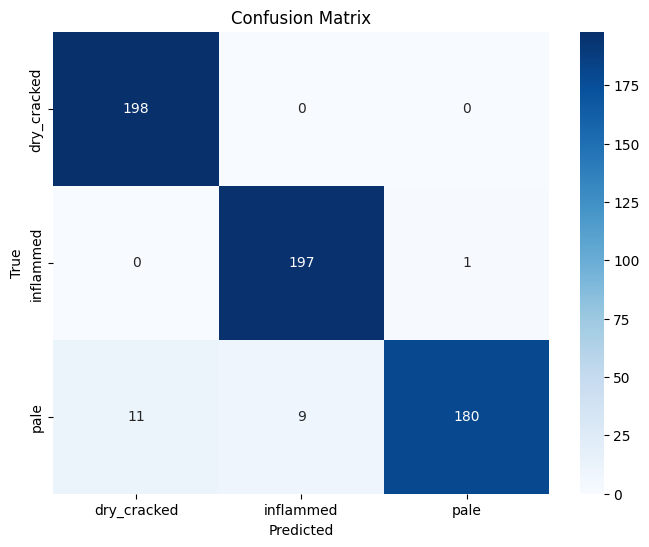

In [4]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Parse XML to get class labels
def parse_xml(xml_file):
    try:
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            if class_name:
                return class_name
        print(f"No class name found in XML: {xml_file}")
        return None
    except Exception as e:
        print(f"Error parsing XML {xml_file}: {e}")
        return None

# Load images and corresponding labels
def load_data(image_dir, xml_dir, class_names):
    images = []
    labels = []
    for class_name in class_names:
        class_folder = os.path.join(image_dir, class_name)
        xml_folder = os.path.join(xml_dir, class_name)
        for img_file in os.listdir(class_folder):
            if img_file.endswith(".jpg"):
                img_path = os.path.join(class_folder, img_file)
                xml_file = os.path.join(xml_folder, img_file.replace(".jpg", ".xml"))
                class_label = parse_xml(xml_file)

                if class_label is None:
                    print(f"Skipping {img_file} due to missing class label.")
                    continue

                if class_label in class_names:
                    images.append(img_path)
                    labels.append(class_names.index(class_label))
                else:
                    print(f"Warning: {class_label} is not a valid class.")
    return images, labels

# Preprocess images
def preprocess_images(image_paths, labels, img_size=(224, 224)):
    images = []
    for img_path in image_paths:
        try:
            if not os.path.exists(img_path):
                print(f"Warning: Image path does not exist: {img_path}")
                continue

            img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
            img = tf.keras.preprocessing.image.img_to_array(img)

            if np.all(img == 0):
                print(f"Warning: Image {img_path} is filled with zeros after conversion.")
                continue
            
            images.append(img)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
    
    images = np.array(images) / 255.0  # Normalize
    labels = np.array(labels)
    return images, labels

# Define class names
class_names = ["dry_cracked", "inflammed", "pale"]

# Directories for images and annotations
image_dir = "C:/Users/kaush/Downloads/lips/lips/augmented_train"
xml_dir = "C:/Users/kaush/Downloads/lips/lips/annotation"

# Load and preprocess the data
image_paths, labels = load_data(image_dir, xml_dir, class_names)
print(f"Number of images: {len(image_paths)}")
print(f"Number of labels: {len(labels)}")
images, labels = preprocess_images(image_paths, labels)

# Display a sample image
if len(images) > 0:
    plt.imshow(images[0])
    plt.title(f"Label: {class_names[labels[0]]}")
    plt.show()
else:
    print("No images were loaded. Please check the image paths and data.")

# Load MobileNet model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(len(class_names), activation='softmax')(x)

# Build the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(images, labels, epochs=50, validation_split=0.15, batch_size=32)

# Plot accuracy and loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# Evaluate the model
preds = np.argmax(model.predict(images), axis=1)

# Confusion matrix and classification report
cm = confusion_matrix(labels, preds)
print(classification_report(labels, preds, target_names=class_names))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Number of test images: 212
Number of test labels: 212


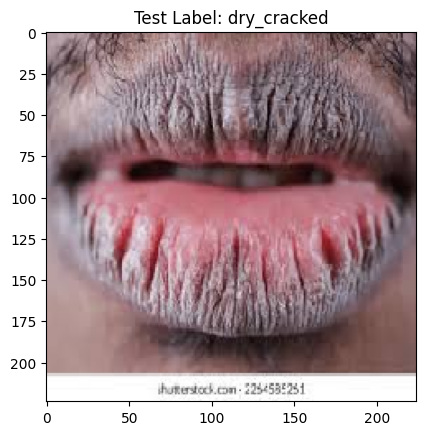

7/7 - 4s - 559ms/step - accuracy: 0.8821 - loss: 0.3554
Test Accuracy: 0.88
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 538ms/step

Classification Report:
              precision    recall  f1-score   support

 dry_cracked       0.90      0.89      0.90        82
   inflammed       0.84      0.92      0.88        77
        pale       0.93      0.81      0.87        53

    accuracy                           0.88       212
   macro avg       0.89      0.87      0.88       212
weighted avg       0.89      0.88      0.88       212



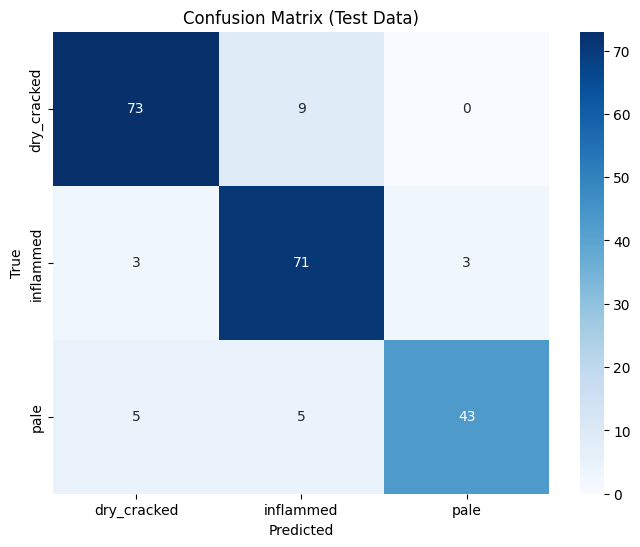

In [5]:
# Path for testing dataset
test_image_dir = "C:/Users/kaush/Downloads/lips/lips/testing"

# Function to preprocess test images
def load_and_preprocess_test_data(image_dir, class_names, img_size=(224, 224)):
    test_images = []
    test_labels = []
    for class_name in class_names:
        class_folder = os.path.join(image_dir, class_name)
        for img_file in os.listdir(class_folder):
            if img_file.endswith(".jpg"):
                img_path = os.path.join(class_folder, img_file)
                try:
                    # Load and preprocess image
                    img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
                    img = tf.keras.preprocessing.image.img_to_array(img)
                    img = img / 255.0  # Normalize
                    test_images.append(img)
                    test_labels.append(class_names.index(class_name))
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")
    test_images = np.array(test_images)
    test_labels = np.array(test_labels)
    return test_images, test_labels

# Load and preprocess testing data
test_images, test_labels = load_and_preprocess_test_data(test_image_dir, class_names)

# Debug: Check loaded test data
print(f"Number of test images: {len(test_images)}")
print(f"Number of test labels: {len(test_labels)}")

# Ensure data is loaded correctly
if len(test_images) > 0:
    plt.imshow(test_images[0])
    plt.title(f"Test Label: {class_names[test_labels[0]]}")
    plt.show()
else:
    print("No test images were loaded. Please check the test data path.")

# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predictions on test data
test_preds = np.argmax(model.predict(test_images), axis=1)

# Calculate metrics
print("\nClassification Report:")
report = classification_report(test_labels, test_preds, target_names=class_names)
print(report)

# Confusion matrix
cm = confusion_matrix(test_labels, test_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Test Data)")
plt.show()


In [6]:
# Function to preprocess and predict a single image
def predict_single_image(image_path, model, class_names, img_size=(224, 224)):
    """
    Predict the class of a single image using the trained model.

    Parameters:
    - image_path: str, path to the input image.
    - model: trained TensorFlow/Keras model.
    - class_names: list, names of the classes.
    - img_size: tuple, target size for resizing the image.

    Returns:
    - Predicted class and class probabilities.
    """
    try:
        # Load the image
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=img_size)
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        
        # Normalize the image
        img_array = img_array / 255.0
        
        # Expand dimensions to match model input shape
        img_array = np.expand_dims(img_array, axis=0)
        
        # Predict the class probabilities
        predictions = model.predict(img_array)
        
        # Get the predicted class
        predicted_class = np.argmax(predictions, axis=1)[0]
        
        # Return the class name and probabilities
        return class_names[predicted_class], predictions[0]
    except Exception as e:
        print(f"Error predicting image: {e}")
        return None, None

# Example usage
image_path = "C:/Users/kaush/Downloads/th (4).jpg"  # Replace with the path to your image
predicted_class, probabilities = predict_single_image(image_path, model, class_names)

if predicted_class:
    print(f"Predicted Class: {predicted_class}")
    print(f"Class Probabilities: {probabilities}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicted Class: inflammed
Class Probabilities: [0.07297458 0.89745194 0.0295735 ]


In [7]:
# Function to preprocess and predict a single image
def predict_single_image(image_path, model, class_names, img_size=(224, 224)):
    """
    Predict the class of a single image using the trained model.

    Parameters:
    - image_path: str, path to the input image.
    - model: trained TensorFlow/Keras model.
    - class_names: list, names of the classes.
    - img_size: tuple, target size for resizing the image.

    Returns:
    - Predicted class and class probabilities.
    """
    try:
        # Load the image
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=img_size)
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        
        # Normalize the image
        img_array = img_array / 255.0
        
        # Expand dimensions to match model input shape
        img_array = np.expand_dims(img_array, axis=0)
        
        # Predict the class probabilities
        predictions = model.predict(img_array)
        
        # Get the predicted class
        predicted_class = np.argmax(predictions, axis=1)[0]
        
        # Return the class name and probabilities
        return class_names[predicted_class], predictions[0]
    except Exception as e:
        print(f"Error predicting image: {e}")
        return None, None

# Example usage
image_path = "c:/Users/kaush/Downloads/th (3).jpg"  # Replace with the path to your image
predicted_class, probabilities = predict_single_image(image_path, model, class_names)

if predicted_class:
    print(f"Predicted Class: {predicted_class}")
    print(f"Class Probabilities: {probabilities}")
    


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Class: dry_cracked
Class Probabilities: [0.49793327 0.08155731 0.42050946]


In [18]:
# Function to preprocess and predict a single image
def predict_single_image(image_path, model, class_names, img_size=(224, 224)):
    """
    Predict the class of a single image using the trained model.

    Parameters:
    - image_path: str, path to the input image.
    - model: trained TensorFlow/Keras model.
    - class_names: list, names of the classes.
    - img_size: tuple, target size for resizing the image.

    Returns:
    - Predicted class and class probabilities.
    """
    try:
        # Load the image
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=img_size)
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        
        # Normalize the image
        img_array = img_array / 255.0
        
        # Expand dimensions to match model input shape
        img_array = np.expand_dims(img_array, axis=0)
        
        # Predict the class probabilities
        predictions = model.predict(img_array)
        
        # Get the predicted class
        predicted_class = np.argmax(predictions, axis=1)[0]
        
        # Return the class name and probabilities
        return class_names[predicted_class], predictions[0]
    except Exception as e:
        print(f"Error predicting image: {e}")
        return None, None

# Example usage
image_path = "C:/Users/kaush/Downloads/lips/lips/testing/pale/download (6).jpg"  # Replace with the path to your image
predicted_class, probabilities = predict_single_image(image_path, model, class_names)

if predicted_class:
    print(f"Predicted Class: {predicted_class}")
    print(f"Class Probabilities: {probabilities}")
    


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Class: pale
Class Probabilities: [0.02412992 0.03098242 0.9448876 ]
